In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [4]:
from luwiji.random_forest import illustration

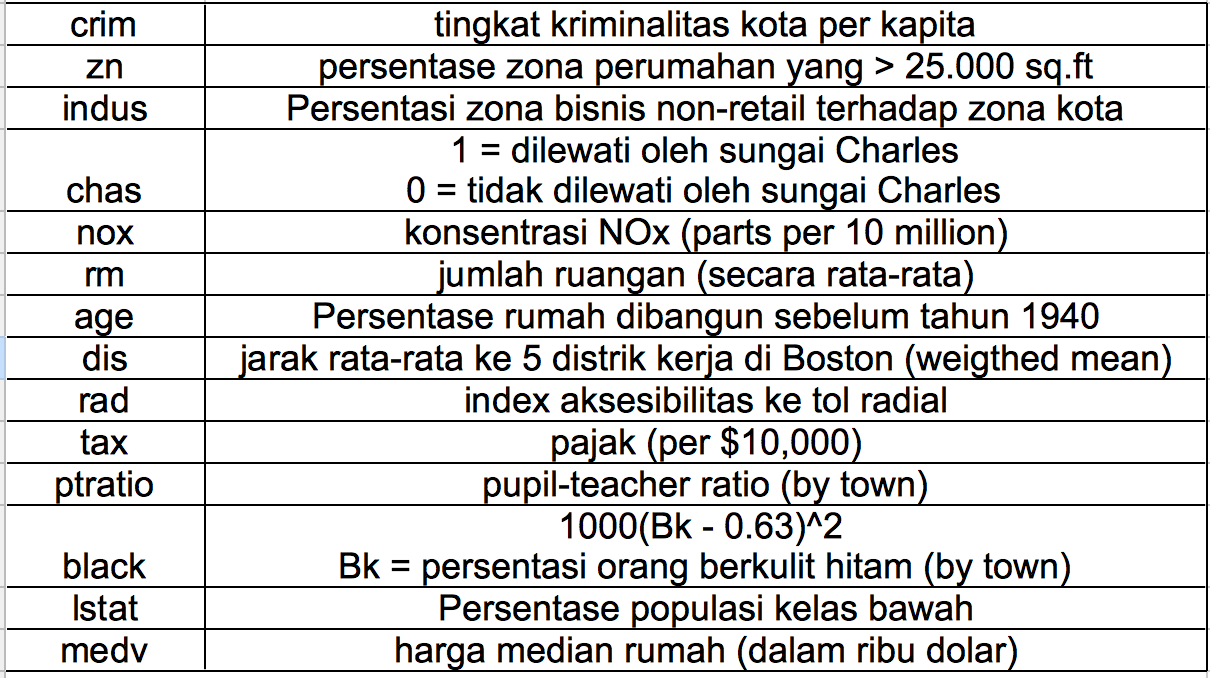

In [5]:
illustration.nomenklatur_house

# import Data

In [6]:
df = pd.read_csv("data/house_price.csv", index_col="ID")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


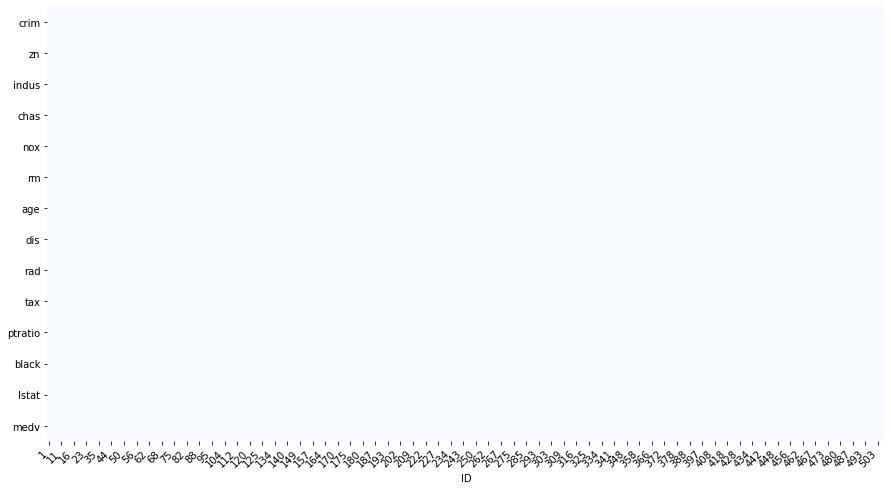

In [7]:
plot_missing_value(df)

# Dataset Splitting

In [8]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

# Training

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
ID,,,,,,,,,,,,,
340,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
118,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
456,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
28,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28
43,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81


In [11]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [12]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm','age', 'dis',
                             'rad', 'tax', 'ptratio', 'black', 'lstat']),
    ('categoric', cat_pipe(), ["chas"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1 , verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   19.4s finished


{'algo__max_depth': 50, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9796825791444227 0.8423714770450014 0.9131952055120968


# Scaling membantu  SVM dan KNN, tapi tidak untuk RF

### Karena Scaling tidak berpengaruh ke algoritma berbasis tree, tapi rf bisa melakukan feature importance

# Feature Importance

# Mean Loss Decrease

### Kita akan melihat rata-rata pengurangan error/loss yang dikontribusikan tiap fitur.
### Untuk kasus klasifikasi, loss yang dipakai adalah gini-impurity, jadi sering disebut juga mean impurity decrease.
### Untuk kasus regresi, loss yan dipakai adalah MSE, mungkin bisa disebut sebagai mean MSE decrease.
### Boleh coba cek tooltip dari random forest, loss yang dimaksud adalah criterion

### Semakin besar loss yang berhasil diturunkan oleh suatu fitur, maka semakin penting fitur tersebut

In [18]:
 from jcopml.feature_importance import mean_loss_decrease

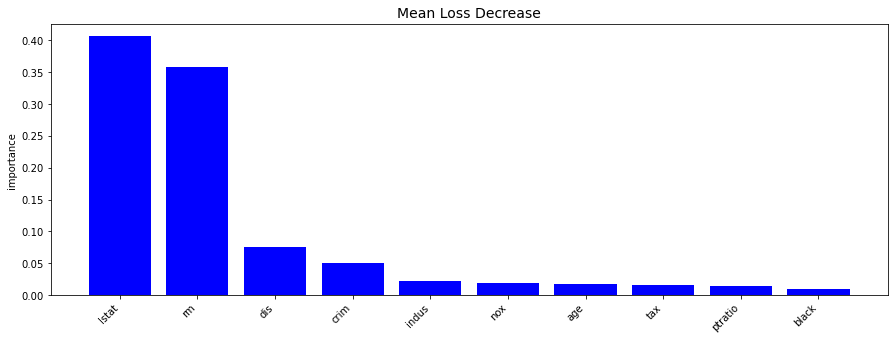

In [19]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=10)

# Mean Score Decrease
### kita acak masing masing variabel dan lihat berapa pengurangan score yang terjadi. Semakin besar penurunan score, artinya fitur itu semakin penting.

In [20]:
from jcopml.feature_importance import mean_score_decrease

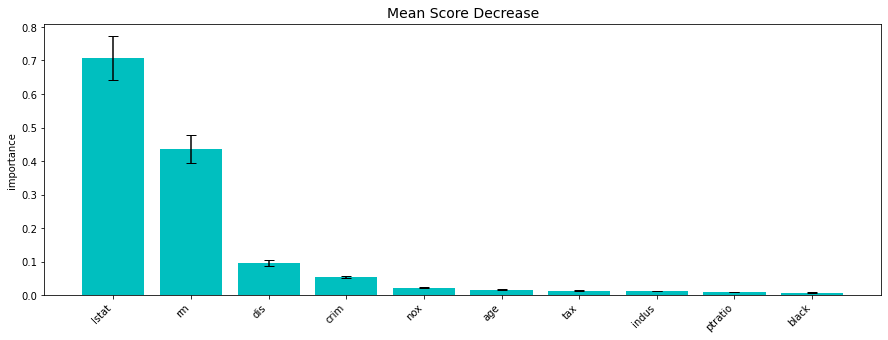

In [21]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# Correlation-Causation Fallacy

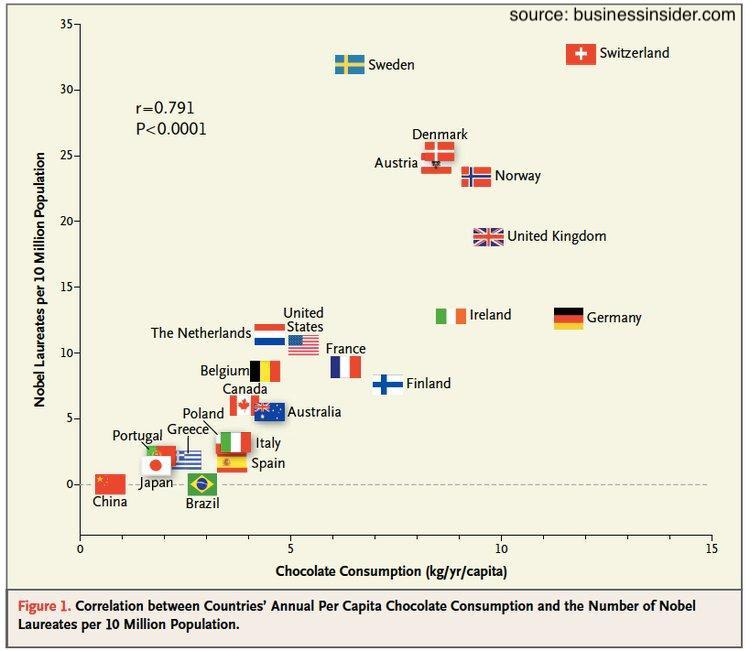

In [22]:
illustration.fallacy1

# Prediction

In [23]:
X_train.iloc[:1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
ID,,,,,,,,,,,,,
340,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.9,9.74


In [25]:
X_train.rad.unique()

array([ 5,  6, 24,  4,  3,  2,  7,  1,  8], dtype=int64)

In [26]:
X_pred = pd.DataFrame([[0.01, 50, 3, 1, 0.8, 3, 20, 4, 1, 300, 10, 400, 5]], columns=X_train.columns)

In [27]:
X_pred

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.01,50,3,1,0.8,3,20,4,1,300,10,400,5


In [28]:
model.predict(X_pred)

array([23.559])

# Save Model

In [29]:
save_model(model.best_estimator_, "rf_house.pkl")

Model is pickled as model/rf_house.pkl
